# Project: Investigate a Dataset (TMDb Movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>I am using TMDB movie dataset for this project. this dataset has information about 10,000 movies collected from The Movie Database (TMDb)

> #### Introduction to dataset:


In [75]:
# Import all the packages needed for analysis
import numpy as numpy
import pandas as pandas
import csv
from datetime import datetime
import matplotlib.pyplot as plt
# to Print our visualizations
%matplotlib inline

> loading data.........

In [76]:
ds = pandas.read_csv('tmdb-movies.csv')
ds.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> #### Questions that can be answered by looking at the datasets are:
> ##### Some general questions that can be answered are:
> <ol>
> <li>Which movie had the highest and lowest profit?</li>
> <li>Which movie had the greatest and least runtime?</li>
> <li>What is the average runtime of all movies?</li>
> <li>Which movie had the highest and lowest budget?</li>
> <li>Which movie had the highest and lowest revenue?</li>
> </ol>
>
> ##### Some questions that can be answered based on the Profit of movies making more then 30M Dollars:
> <ol>
> <li>What is the average budget of the movie?</li>
> <li>What is the average revenue of the movie?</li>
> <li>What is the average runtime of the movie?</li>
> <li>Which are the successfull genres?</li>
> <li>Which are the most frequent cast involved?</li>
> </ol>

<a id='wrangling'></a>
## Data Wrangling

>Here I will clean and trim dataset for analysis.
>
> #### Observations from above dataset are:
> <ol>
> <li>dataset do not provide the currency for  columns i am dealing with so chose dollars as currency</li>
> </ol>
> Let's check the dataset 

In [77]:
ds.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [78]:
ds.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [79]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [80]:
sum(ds.duplicated())

1

>Data Cleaning
>let's remove some columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage',etc

In [81]:

DeletedColumns = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count', 'vote_average']
ds.drop(DeletedColumns, axis=1, inplace=True)
ds.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


> Let us see the count of entries in our data set.

In [61]:
rows, col = ds.shape
print('We have {} total rows and {} columns.'.format(rows-1, col))

We have 10865 total rows and 8 columns.


> Let us delete the duplicated row that we have in our data set.

In [83]:

ds.drop_duplicates(keep = 'first', inplace = True)
rows, col = ds.shape
print('After droping duplicates we have {} total rows and {} columns.'.format(rows-1, col))

After droping duplicates we have 10864 total rows and 8 columns.


>We cannot calculate profit for movies having the budget or revenue have a value of '0'

In [85]:

columns = ['budget', 'revenue']
ds[columns] = ds[columns].replace(0, np.NaN)
ds.dropna(subset = columns, inplace = True)
rows, col = ds.shape
print('We now have only {} rows.'.format(rows-1))

We now have only 3853 rows.


>converting release_date column into date format.

In [87]:

ds.release_date = pandas.to_datetime(ds['release_date'])

ds.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


> Fifth, Convert budget and revenue column to int datatype.

In [88]:

columns = ['budget', 'revenue']
ds[columns] = ds[columns].applymap(numpy.int64)
ds.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

> Replace runtime value of 0 to NAN.

In [89]:

ds['runtime'] = ds['runtime'].replace(0, numpy.NaN)
ds.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


> Data Wrangling completed  

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1.1 (Which movie had the highest and lowest profit?)

> So we will first add a column for profit in our dataset.

In [91]:
ds['profit'] = ds['revenue'] - ds['budget']
ds.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [92]:
ds.loc[ds['profit'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [93]:
ds.loc[ds['profit'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

> #### Which movie had the highest and lowest profit?
> Highest :-  Avatar with profit of $254450584.  Lowest:-  The Warrior's Way with profit of $-413912431 

### Research Question 1.2  (Which movie had the greatest and least runtime?)

In [18]:
ds.loc[ds['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

In [94]:
ds.loc[ds['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

> #### Which movie had the greatest and least runtime?
> Greatest :- Carlos with runtime of 338 minutes
> Least :-  Kid's Story with runtime of 15 minutes

### Research Question 1.3  (What is the average runtime of all movies?)

In [95]:
ds['runtime'].mean()

109.22029060716139

> #### What is the average runtime of all movies?
> Average runtime of the movies was 109.22 minutes
>
> Let us plot a histogram for the same.

(array([3.000e+00, 3.900e+01, 2.359e+03, 1.264e+03, 1.490e+02, 3.400e+01,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 15. ,  47.3,  79.6, 111.9, 144.2, 176.5, 208.8, 241.1, 273.4,
        305.7, 338. ]),
 <a list of 10 Patch objects>)

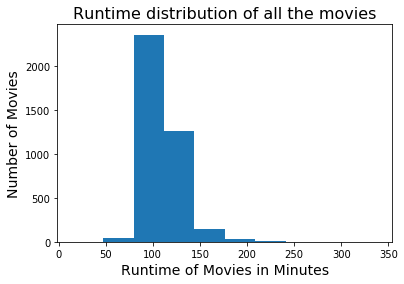

In [104]:
plt.xlabel('Runtime of Movies in Minutes',size=14)
plt.ylabel('Number of Movies',size=14)
plt.title('Runtime distribution of all the movies' ,size=16)
plt.hist(ds['runtime'])

> We can see that most of the movie are in the range of 100 minutes to 120 minutes.
>
> Let us check if there a relation between the Runtime and Profit

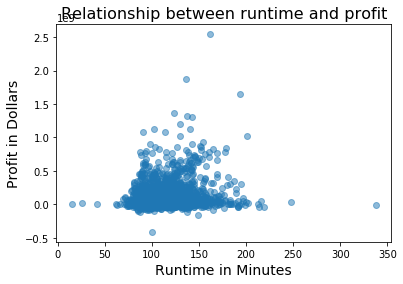

In [105]:
plt.xlabel('Runtime in Minutes',size=14)
plt.ylabel('Profit in Dollars',size=14)
plt.title('Relationship between runtime and profit',size=16)
plt.scatter(ds['runtime'], ds['profit'], alpha=0.5)
plt.show()

> Most of the movies have runtime in range of 85 to 120 Minutes.

### Research Question 1.4  (Which movie had the highest and lowest budget?)

In [106]:
ds.loc[ds['budget'].idxmax()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

In [24]:
ds.loc[ds['budget'].idxmin()]

budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

> #### Which movie had the highest and lowest budget?
> Highest :-The Warrior's Way with budget of  425000000 dollars Lowest :- Lost & Found with budget of $1 dollars


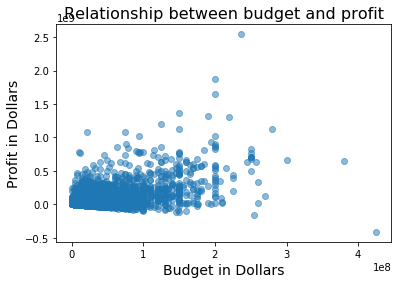

In [107]:
# x-axis
plt.xlabel('Budget in Dollars', size=14)
# y-axis
plt.ylabel('Profit in Dollars', size=14)
# Title of the histogram
plt.title('Relationship between budget and profit', size=16)
plt.scatter(ds['budget'], ds['profit'], alpha=0.5)
plt.show()

> We can see that there no as such relationship between budget and profits, But yes there are very less flims which didnt make profit when the budget was greater then 20M Dollar.

### Research Question 1.5  (Which movie had the highest and lowest revenue?)

In [108]:
ds.loc[ds['revenue'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [109]:
ds.loc[ds['revenue'].idxmin()]

budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
profit                                                     -5999998
Name: 5067, dtype: object

> #### Which movie had the highest and lowest revenue?
> Highest :- Avatar with revenue of 2781505847 dollars
>
> Lowest :- Shattered Glass with revenue of 2 dollars
>


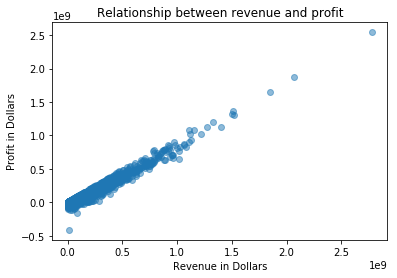

In [28]:
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and profit')
plt.scatter(tmdb_data['revenue'], tmdb_data['profit'], alpha=0.5)
plt.show()

> We can see that there is a strong relationship between profit and revenue, higher the profit, higher the revenue.
>

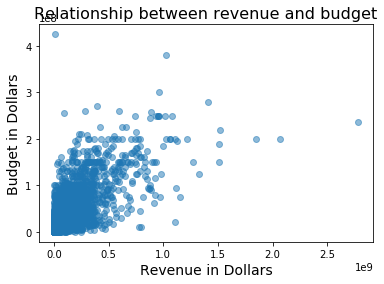

In [110]:
plt.xlabel('Revenue in Dollars',size = 14)
plt.ylabel('Budget in Dollars',size = 14)
plt.title('Relationship between revenue and budget',size = 16)
plt.scatter(ds['revenue'], ds['budget'], alpha=0.5)
plt.show()

> Most of the movie have a revenue upto $50M 

### Research Question 2.1  (What is the average budget of the movie w.r.t Profit of movies making more then $30M?)

> Now since in all the remaining question we are going to answer them with respect to profit, we will now clean our datset and only incudde data of movies who made profit of more then 30M$.

In [118]:
# Dataframe which has data of movies which made profit of more the 25M Dollars.
ds_profit= ds[ds['profit'] >= 30000000]
# Reindexing the dataframe
ds_profit.index = range(len(ds_profit))
#showing the dataset
ds_profit.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [112]:
# Printing the info of the new dataframe
ds_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 9 columns):
budget            1672 non-null int64
revenue           1672 non-null int64
original_title    1672 non-null object
cast              1671 non-null object
runtime           1672 non-null int64
genres            1672 non-null object
release_date      1672 non-null datetime64[ns]
release_year      1672 non-null int64
profit            1672 non-null int64
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 117.6+ KB


> We can see that we have 1671 movies which has profit more then 30$

In [119]:
ds_profit['budget'].mean()

53932204.20633971

> #### What is the average budget of the movie w.r.t Profit of movies making more then 30M?
> So the average budget of the movies is 53932204.20$ 

### Research Question 2.2  (What is the average revenue of the movie w.r.t Profit of movies making more then 30M$ ?)

In [120]:
ds_profit['revenue'].mean()

217458935.18540668

> #### What is the average revenue of the movie w.r.t Profit of movies making more then 30M Dollars?
> So the average revenue of the movies is 206359440.87$

### Research Question 2.3  (What is the average runtime of the movie w.r.t Profit of movies making more then 30M Dollars?)

In [121]:
ds_profit['runtime'].mean()

112.752990430622

> #### What is the average runtime of the movie w.r.t Profit of movies making more then 30M Dollars?
> So the average runtime of the movies is 112.75 Minutes

### Research Question 2.4  (Which are the successfull genres w.r.t Profit of movies making more then 30M Dollars?)

In [122]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
genres_count = pandas.Series(ds_profit['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              634
Comedy             606
Action             546
Thriller           508
Adventure          431
Romance            277
Crime              262
Family             260
Science Fiction    242
Fantasy            223
Horror             169
Mystery            139
Animation          134
Music               58
History             54
War                 53
Western             19
Documentary          8
TV Movie             1
Foreign              1
dtype: int64

> #### Which are the successfull genres w.r.t Profit of movies making more then 30M$ ?
> So the Top 10 Genres are Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy
>
> Lets plot

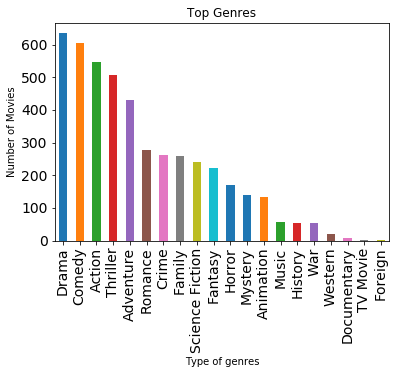

In [125]:
diagram = genres_count.plot.bar(fontsize = 14)
diagram.set(title = 'Top Genres')
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
plt.show()

> We can clearly see in the visualization that most movies has drame as a genre which tends to higher profit.

### Research Question 2.5  (Which are the most frequent cast involved w.r.t Profit of movies making more then 30M Dollars?)

In [126]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
cast_count = pd.Series(ds_profit['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(10)

Tom Cruise            28
Tom Hanks             27
Brad Pitt             26
Robert De Niro        24
Cameron Diaz          23
Eddie Murphy          23
Bruce Willis          22
Johnny Depp           22
Sylvester Stallone    21
Denzel Washington     20
dtype: int64

> #### Which are the most frequent cast involved w.r.t Profit of movies making more then 30 Dollars?
> So the Top 5 cast are Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis
>
> Lets visualize this with a plot

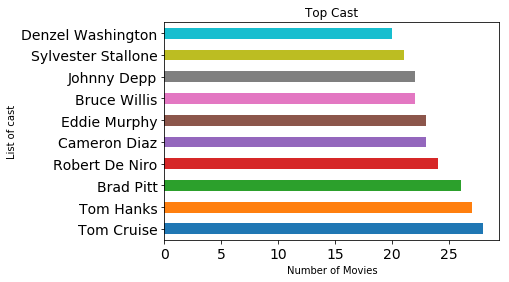

In [128]:
diagram = cast_count.head(10).plot.barh(fontsize = 14)
diagram.set(title = 'Top Cast')
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of cast')
plt.show()

> We can clearly see in the visualization that most movies have Tom Cruise as a cast which tends to higher profit.

<a id='conclusions'></a>
## Conclusions

>
> The average budget of the movies can be arround 53932204.20dollers
> The average runtime of the movies can be arround 112.75 Minutes
>
> The Top 10 Genres we should focus on should be Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy
> 
> The Top 5 cast we should focus on should be Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis
>
> The average revenue of the movies will be arround 206359440.87$ 

> #### The limitations 
>Conclusion is not full proof the above requirement the movie will be a big hit 
>
>We also lost some of the data in the data cleaning steps.
>We dont know the revenue and budget of the movie  which was removed in cleaning steps might have affected our analysis.
 